<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Columns" data-toc-modified-id="Columns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Columns</a></span></li><li><span><a href="#NaNs" data-toc-modified-id="NaNs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NaNs</a></span><ul class="toc-item"><li><span><a href="#Renaming" data-toc-modified-id="Renaming-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Renaming</a></span></li><li><span><a href="#Types" data-toc-modified-id="Types-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Types</a></span></li><li><span><a href="#Numerical-data" data-toc-modified-id="Numerical-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Numerical data</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li></ul></li><li><span><a href="#Save" data-toc-modified-id="Save-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save</a></span></li></ul></div>

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import math

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Loading data

In [2]:
df = pd.read_csv('../../data/raw/carbon-dioxide.csv')
df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [3]:
df.tail()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
715,2017,8,2017.6219,NaN,NaN,NaN,NaN
716,2017,9,2017.7068,NaN,NaN,NaN,NaN
717,2017,10,2017.7890,NaN,NaN,NaN,NaN
718,2017,11,2017.8740,NaN,NaN,NaN,NaN
719,2017,12,2017.9562,NaN,NaN,NaN,NaN


In [4]:
original_shape = df.shape
original_shape

(720, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
Year                                 720 non-null int64
Month                                720 non-null int64
Decimal Date                         720 non-null float64
Carbon Dioxide (ppm)                 703 non-null float64
Seasonally Adjusted CO2 (ppm)        703 non-null float64
Carbon Dioxide Fit (ppm)             707 non-null float64
Seasonally Adjusted CO2 Fit (ppm)    707 non-null float64
dtypes: float64(5), int64(2)
memory usage: 39.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,720.0,1987.500000,17.330141,1958.0000,1972.7500,1987.5000,2002.250000,2017.0000
Month,720.0,6.500000,3.454452,1.0000,3.7500,6.5000,9.250000,12.0000
Decimal Date,720.0,1987.997492,17.332539,1958.0411,1973.0199,1987.9986,2002.977425,2017.9562
Carbon Dioxide (ppm),703.0,352.375633,26.241884,313.2100,328.5550,349.8000,373.195000,407.6500
Seasonally Adjusted CO2 (ppm),703.0,352.375206,26.171620,314.4200,329.0100,349.8200,372.935000,406.0400
Carbon Dioxide Fit (ppm),707.0,352.054074,26.241431,312.4500,328.3400,349.3700,372.840000,407.2800
Seasonally Adjusted CO2 Fit (ppm),707.0,352.049830,26.178904,314.8900,328.4000,349.2700,372.605000,405.8300


There is no empty rows at the end of dataset, but there's a large amount of NaNs in different columns.
  
Columns with anomalies:  
- **Year**: from 1958 to 2017, integer, all rows filled. Should it be datetime.year?
- **Month**: the data is correct, from 1 to 12, integer, all rows filled. Should it be datetime.month?
- **Decimal Date**: from 1958 to 2017, integer, all rows filled.
- **(ppm) columns**: missing rows

# Columns

In [7]:
# Cleaning column names
df.columns = [x.strip() for x in df.columns]

Checking the CO2 columns to decide which one(s) we will use:

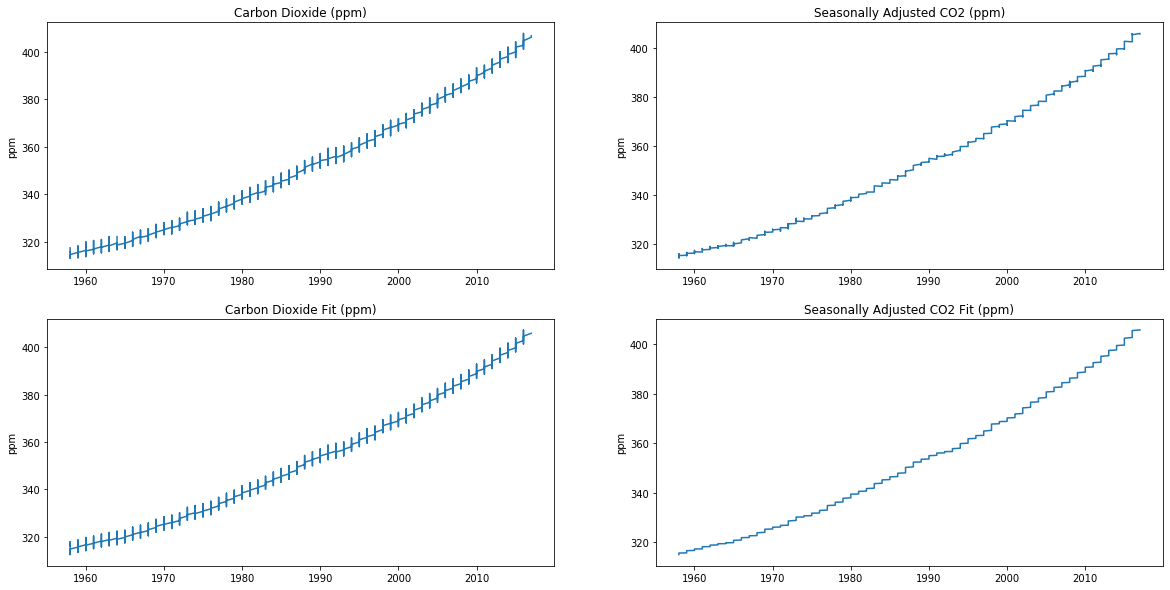

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs[0, 0].plot('Year', 'Carbon Dioxide (ppm)', data=df)
axs[0, 0].title.set_text('Carbon Dioxide (ppm)')

axs[0, 1].plot('Year', 'Seasonally Adjusted CO2 (ppm)',  data=df)
axs[0, 1].title.set_text('Seasonally Adjusted CO2 (ppm)')

axs[1, 0].plot('Year', 'Carbon Dioxide Fit (ppm)',  data=df)
axs[1, 0].title.set_text('Carbon Dioxide Fit (ppm)')

axs[1, 1].plot('Year', 'Seasonally Adjusted CO2 Fit (ppm)', data=df)
axs[1, 1].title.set_text('Seasonally Adjusted CO2 Fit (ppm)')

for ax in axs.flat:
    ax.set(ylabel='ppm')
    
plt.show()

Closer look to the seasonally adjusted columns:

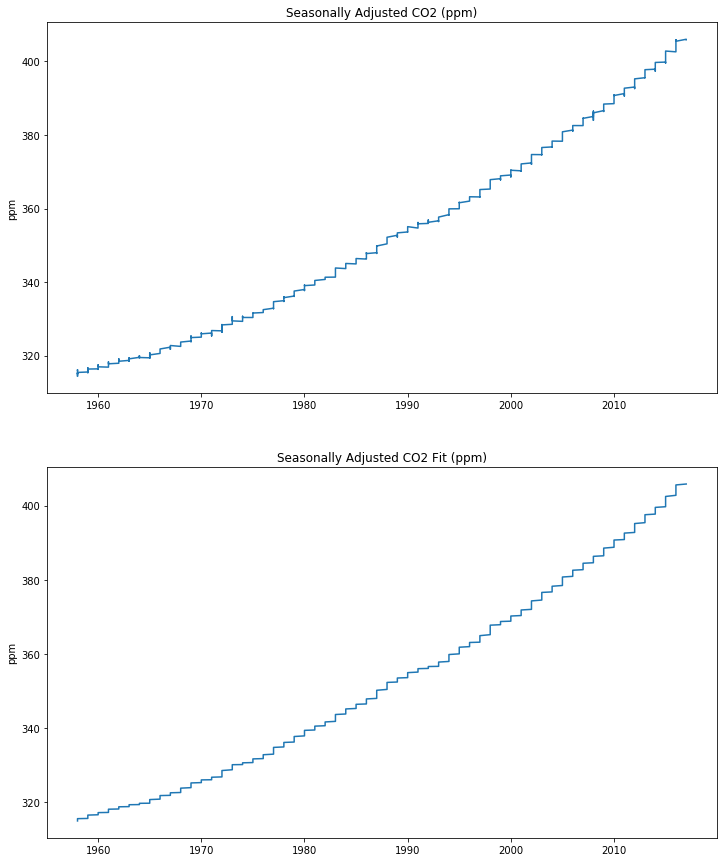

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(12,15))

axs[0].plot('Year', 'Seasonally Adjusted CO2 (ppm)',  data=df)
axs[0].title.set_text('Seasonally Adjusted CO2 (ppm)')

axs[1].plot('Year', 'Seasonally Adjusted CO2 Fit (ppm)', data=df)
axs[1].title.set_text('Seasonally Adjusted CO2 Fit (ppm)')

for ax in axs.flat:
    ax.set(ylabel='ppm')
    
plt.show()

We decide to use the `Seasonally Adjusted CO2 Fit` since it is smoother.

In [10]:
df.drop(['Carbon Dioxide (ppm)', 'Seasonally Adjusted CO2 (ppm)', 'Carbon Dioxide Fit (ppm)'], axis=1, inplace=True)
df.head()

,Year,Month,Decimal Date,Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN
1,1958,2,1958.1260,NaN
2,1958,3,1958.2027,314.89
3,1958,4,1958.2877,314.98
4,1958,5,1958.3699,315.06


In [11]:
print(f'Original shape: {original_shape}')
print(f'New shape:      {df.shape}')

Original shape: (720, 7)
New shape:      (720, 4)


# NaNs

In [12]:
# Percentage of NaN values per column
print('\nPercentage of NaNs per column:')
nan_values = pd.DataFrame(((df.isnull().sum()) / df.shape[0]*100).sort_values(ascending=False))
display(nan_values[nan_values[0] > 0])


Percentage of NaNs per column:


,0
Seasonally Adjusted CO2 Fit (ppm),1.805556


In [13]:
print('\nRows with the small amount of NaNs:')
df[df.isna().any(axis=1)]


Rows with the small amount of NaNs:


,Year,Month,Decimal Date,Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN
1,1958,2,1958.1260,NaN
709,2017,2,2017.1260,NaN
710,2017,3,2017.2027,NaN
711,2017,4,2017.2877,NaN
712,2017,5,2017.3699,NaN
713,2017,6,2017.4548,NaN
714,2017,7,2017.5370,NaN
715,2017,8,2017.6219,NaN
716,2017,9,2017.7068,NaN


Since they are the very beginning and the very end, we drop these rows with NaN values: the two first months of 1958 and all of 2017 except January.

In [14]:
df.dropna(inplace=True)

In [15]:
df.reset_index(inplace=True)

In [16]:
print(f'Original shape: {original_shape}')
print(f'New shape:      {df.shape}')

Original shape: (720, 7)
New shape:      (707, 5)


## Renaming

In [17]:
df.columns

Index(['index', 'Year', 'Month', 'Decimal Date',
       'Seasonally Adjusted CO2 Fit (ppm)'],
      dtype='object')

In [18]:
df.rename(columns={'Decimal Date': 'Date'}, inplace=True)
df.columns

Index(['index', 'Year', 'Month', 'Date', 'Seasonally Adjusted CO2 Fit (ppm)'], dtype='object')

## Types

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 5 columns):
index                                707 non-null int64
Year                                 707 non-null int64
Month                                707 non-null int64
Date                                 707 non-null float64
Seasonally Adjusted CO2 Fit (ppm)    707 non-null float64
dtypes: float64(2), int64(3)
memory usage: 27.7 KB


## Numerical data

In [20]:
df_numeric = df.select_dtypes(exclude=['object'])
# df_numeric.head()

### Outliers

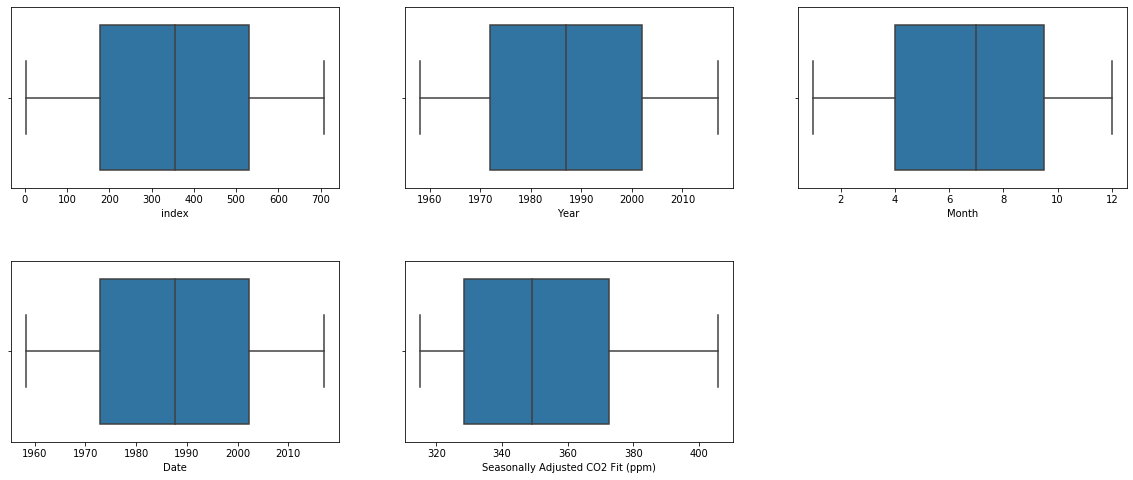

In [21]:
# Visualizing the outliers with boxplots
f = plt.figure(figsize=(20, 8))
i=1
import math
for col in df_numeric.columns:
    subplot = f.add_subplot(math.ceil(df_numeric.shape[1]/3),3,i)
    sns.boxplot(x=df_numeric[col].dropna(),whis=10)
    i=i+1
plt.subplots_adjust(hspace=0.4);

As expected after what we've seen so far, there are no outliers.

# Save

In [22]:
df.to_csv('../../data/processed/carbon-dioxide', index=False)